In [2]:
# https://stackoverflow.com/questions/43725794/pandas-apply-axvspan-to-all-subplots
import numpy as np
import pandas as pd

In [3]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df1 = df.rename_axis('date').reset_index()

import matplotlib.pyplot as plt

recent = df1[df1.date.dt.year >= 2000]

# Get only April 1 and Jume 30 each year
spring_months = df1[((df1.date.dt.month == 4) & (df1.date.dt.day == 1)) | ( (df1.date.dt.month == 6) & (df1.date.dt.day == 30) )]['date']

# Make pivot table with data, one measuring station per column.
#recent = recent.pivot(index='Date', columns='Station', values = 'Niveau(m)')

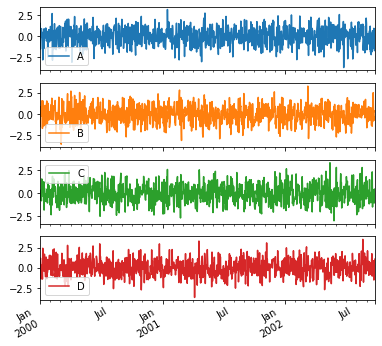

In [19]:
ax = df.plot(subplots=True, figsize=(6,6))


# Group the spring end-dates by year
years = spring_months.drop_duplicates().groupby(spring_months.dt.year)

In [24]:
# Loop through groups and add axvspan between April 1 and June 30 each year
for n, g in years:
    print("n=",n, "g=",g)
    [i.axvspan(g.iloc[0], g.iloc[1], facecolor='g', alpha=0.5) for i in ax] 
    if g.iloc[0].year == 2016:
        plt.show()
        break

n= 2000 g= 91    2000-04-01
181   2000-06-30
Name: date, dtype: datetime64[ns]
n= 2001 g= 456   2001-04-01
546   2001-06-30
Name: date, dtype: datetime64[ns]
n= 2002 g= 821   2002-04-01
911   2002-06-30
Name: date, dtype: datetime64[ns]


In [23]:
plt.show()

In [26]:
!pip install pandas-datareader

     |████████████████████████████████| 109 kB 9.2 MB/s 


AttributeError: 'numpy.ndarray' object has no attribute 'axvspan'

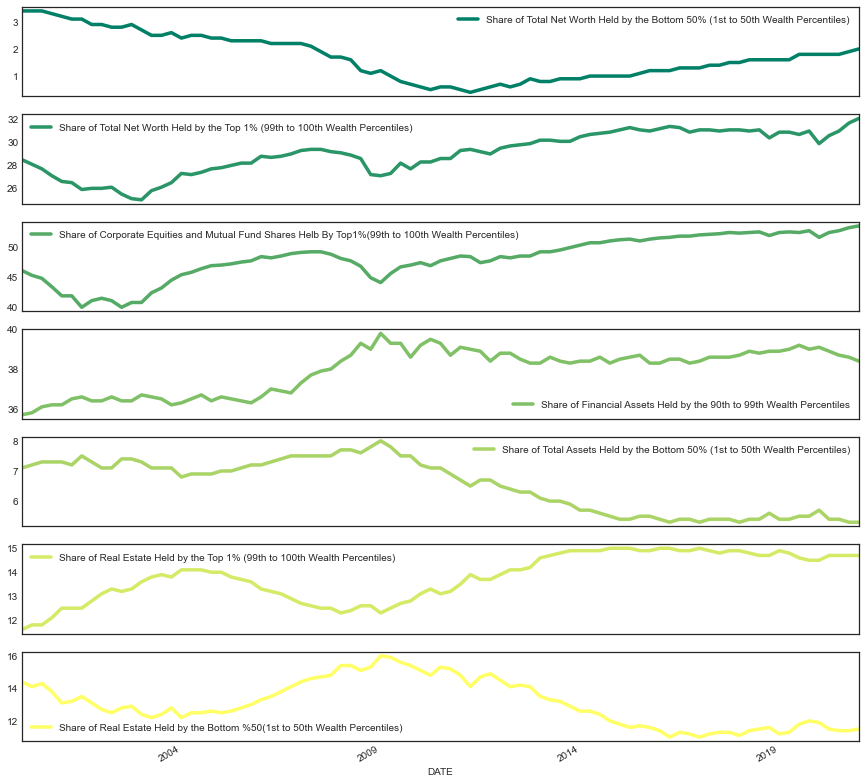

In [38]:
# https://stackguides.com/questions/68329255/shading-between-two-lines-with-matplotlib
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import pandas as pd
import datetime
start = datetime.datetime (2000,1,1)
end = datetime.datetime (2021,5,1)
df  = pdr.DataReader(['WFRBSB50215', 'WFRBST01134','WFRBST01122', 'WFRBSN09139', 'WFRBSB50189', 'WFRBST01110','WFRBSB50191'],'fred',start, end)
df.columns = ['Share of Total Net Worth Held by the Bottom 50% (1st to 50th Wealth Percentiles)',
              'Share of Total Net Worth Held by the Top 1% (99th to 100th Wealth Percentiles)', 
              'Share of Corporate Equities and Mutual Fund Shares Helb By Top1%(99th to 100th Wealth Percentiles)', 
              'Share of Financial Assets Held by the 90th to 99th Wealth Percentiles',
              'Share of Total Assets Held by the Bottom 50% (1st to 50th Wealth Percentiles)',
              'Share of Real Estate Held by the Top 1% (99th to 100th Wealth Percentiles)',
              'Share of Real Estate Held by the Bottom %50(1st to 50th Wealth Percentiles)'
              ]
ax = df.plot(subplots=True, layout=(7,1), figsize=(15,15), linewidth=3.5, colormap="summer")
ax.axvspan('2007-1-12', '2009-6-1', color='c', alpha=0.5)
ax.axvspan('2019-12-1', '2020-2-1',color= 'orange', alpha=0.5)
plt.xlabel('Date')
ax[0,].set_title('Share of Total Net Worth Held by the Bottom 50%')
ax[0,].set_ylabel('Percent of Aggregate')
ax[1,].set_title('Share of Total Net Worth Held by the Top 1%')
ax[1,].set_ylabel('Percent of Aggregate')
ax[2,].set_title('Share of Corporate Equities and Mutual Fund Shares Helb By Top 1%')
ax[2,].set_ylabel('Percent of Aggregate')
ax[3,].set_title('Share of Financial Assets Held by the 90th to 99th Wealth Percentiles')
ax[3,].set_ylabel('Percent of Aggregate')
ax[4,].set_title('Share of Total Assets Held by the Bottom 50% ')
ax[4,].set_ylabel('Percent of Aggregate')
ax[5,].set_title('Share of Real Estate Held by the Top 1%')
ax[5,].set_ylabel('Percent of Aggregate')
ax[6,].set_title('Share of Real Estate Held by the Bottom %50')
ax[6,].set_ylabel('Percent of Aggregate')
plt.tight_layout()
plt.style.use('seaborn-white')
plt.show()

[[<AxesSubplot:xlabel='Date', ylabel='Percent of Aggregate'>]
 [<AxesSubplot:xlabel='Date', ylabel='Percent of Aggregate'>]
 [<AxesSubplot:xlabel='Date', ylabel='Percent of Aggregate'>]
 [<AxesSubplot:xlabel='Date', ylabel='Percent of Aggregate'>]
 [<AxesSubplot:xlabel='Date', ylabel='Percent of Aggregate'>]
 [<AxesSubplot:xlabel='Date', ylabel='Percent of Aggregate'>]
 [<AxesSubplot:xlabel='Date', ylabel='Percent of Aggregate'>]]


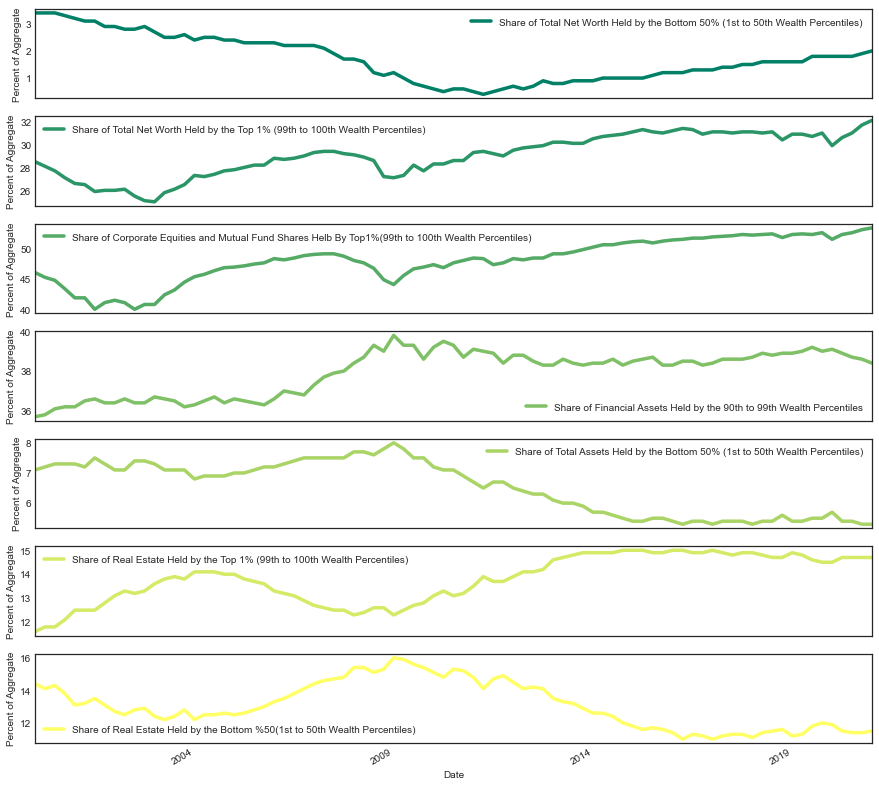

In [40]:
# df.columns
axes = df.plot(subplots=True, layout=(7, 1), figsize=(15, 15), linewidth=3.5,
               colormap="summer", ylabel='Percent of Aggregate', xlabel='Date')
print(axes)

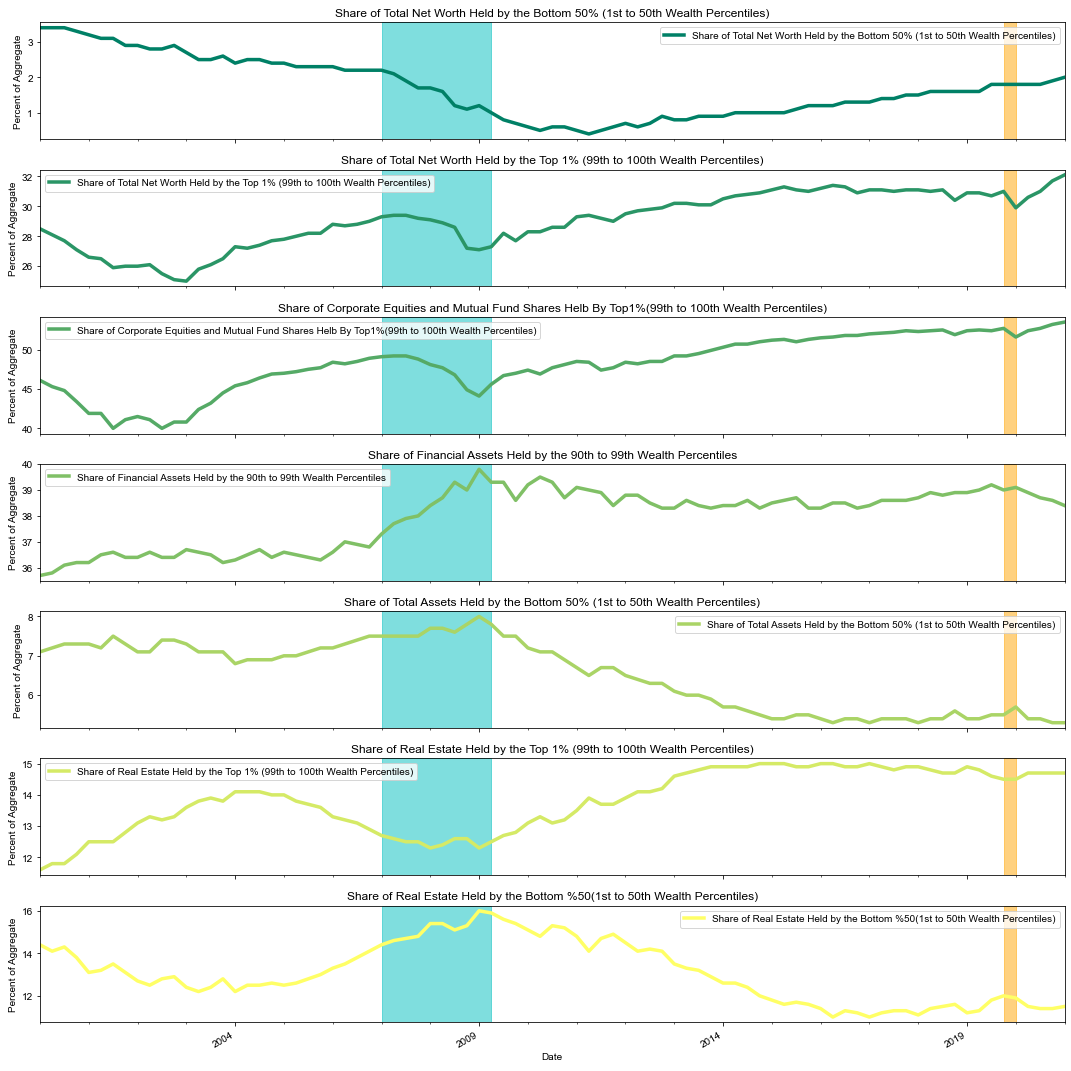

In [28]:
axes = df.plot(subplots=True, layout=(7, 1), figsize=(15, 15), linewidth=3.5,
               colormap="summer", ylabel='Percent of Aggregate', xlabel='Date')

for (ax,), col in zip(axes, df.columns):
    ax.axvspan('2007-1-12', '2009-6-1', color='c', alpha=0.5)
    ax.axvspan('2019-12-1', '2020-2-1', color='orange', alpha=0.5)
    ax.set_title(col)

plt.tight_layout()
plt.style.use('seaborn-white')
plt.show()

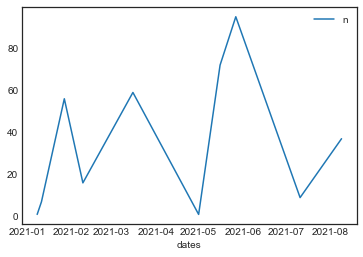

In [33]:
from datetime import date
import random

start_date = date.today().replace(day=1, month=1).toordinal()
end_date = date.today().toordinal()

df=pd.DataFrame.from_dict({'dates':[ date.fromordinal(random.randint(start_date, end_date)) for i in range(10) ]
                        ,'n':np.random.randint(0,100,10)})
df.index=df['dates']; del df['dates']
df.sort_index(inplace=True)
ax=df.plot()


AttributeError: 'Index' object has no attribute 'month'

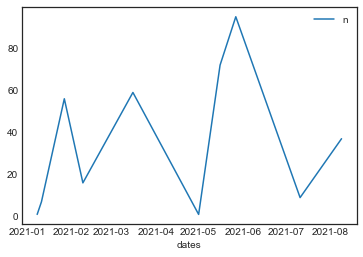

In [34]:
ax = df.plot()
# Getting the boundaries for dates in feb and march
period = df[(df.index.month > 1) & (df.index.month < 3)].index
# Highlighting
ax.axvspan(min(period) - MonthBegin(), max(period) + MonthEnd(),
           facecolor='g', edgecolor='none', alpha=.2)